# IMDB 영화 리뷰 분류
* 인터넷 영화 데이터베이스
* DNN으로 리뷰 문장이 긍정인지 부정인지 예측

## 데이터 확인

In [ ]:
from keras.datasets import imdb

# num_words : 가장 많이 나오는 단어의 개수 - 10000개만 사용하겠다
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

Using TensorFlow backend.


In [ ]:
train_data.shape

(25000,)

In [ ]:
type(train_data[0]) # 리스트가 들어있음

list

In [ ]:
train_data[0][:5] # 이미 전처리 되어 있으며 숫자 리스트로 구성됨

[1, 14, 22, 16, 43]

In [ ]:
train_labels[0]

1

In [ ]:
# 10000개만 사용하므로 최대 인덱스 값은 9999
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()]) # dict 뒤집기

# 리뷰 디코딩
# 0, 1, 2 은 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺸다
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 전처리
# 리스트 데이터를 텐서로 변환

In [ ]:
import numpy as np

# from tensorflow.keras.utils import to_categorical 의 to_categorical 함수와 동일
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # one-hot encoding을 위한 벡터(2d 텐서)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # 특정 값만 1 할당
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_train.shape) # 출현하는 특정 단어에 1, 없으면 0으로 할당
x_train[0]

(25000, 10000)


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## layer 추가

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## compile

In [ ]:
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## fit

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.5148 - accuracy: 0.7829 - val_loss: 0.3870 - val_accuracy: 0.8707
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3053 - accuracy: 0.9020 - val_loss: 0.3035 - val_accuracy: 0.8894
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2231 - accuracy: 0.9283 - val_loss: 0.2852 - val_accuracy: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1754 - accuracy: 0.9431 - val_loss: 0.2765 - val_accuracy: 0.8899
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1436 - accuracy: 0.9532 - val_loss: 0.2954 - val_accuracy: 0.8822
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1179 - accuracy: 0.9641 - val_loss: 0.2944 - val_accuracy: 0.8844
Epoch 7/20
15000/15000 [==============================] - 1s 9

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

## Loss 시각화

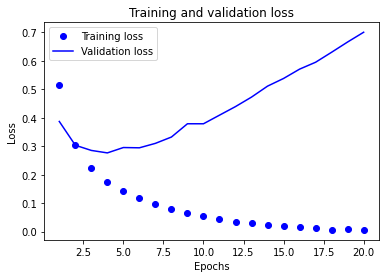

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# val_loss가 줄어들다 다시 증가하고 있음

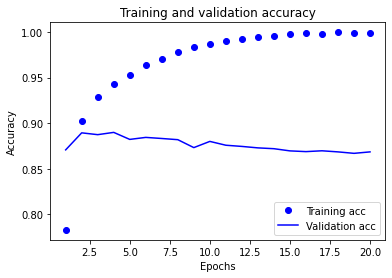

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 과적합 방지

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
# 가장 결과가 좋은 4번만 epochs 수행

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.5090 - accuracy: 0.7973 - val_loss: 0.3981 - val_accuracy: 0.8628
Epoch 2/4
15000/15000 [==============================] - 1s 91us/step - loss: 0.3119 - accuracy: 0.9060 - val_loss: 0.3109 - val_accuracy: 0.8861
Epoch 3/4
15000/15000 [==============================] - 1s 92us/step - loss: 0.2273 - accuracy: 0.9285 - val_loss: 0.2848 - val_accuracy: 0.8890
Epoch 4/4
15000/15000 [==============================] - 1s 95us/step - loss: 0.1768 - accuracy: 0.9423 - val_loss: 0.2809 - val_accuracy: 0.8867


In [ ]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 5s 181us/step


[0.2973456291389465, 0.8796399831771851]

In [ ]:
model.predict(x_test)

array([[0.30893388],
       [0.99783033],
       [0.9062265 ],
       ...,
       [0.10992223],
       [0.2273927 ],
       [0.61136293]], dtype=float32)